# **<span style = "color:#C85740"> Occupancy Detection </span>**



****

### Data Source

**Data Set https://archive.ics.uci.edu/dataset/357/occupancy+detection**

### Importation des librairies nécessaires

In [224]:
# Un module de traitement de données
import pandas as pd
#un package Python pour le calcul scientifique
import numpy as np

# Module de traçage de Python.
# Nous améliorons les graphiques en remplaçant les styles par défaut de Matplotlib par ceux de Seaborn.
import matplotlib.pyplot as plt
import seaborn as sns

#Un module pour contrôler the warnings générés par Python
import warnings
#ignorer all warnings
warnings.filterwarnings('ignore')
#Une commande utilisée pour afficher les graphiques créés par la bibliothèque "matplotlib" directement dans les cellules de sortie du notebook
%matplotlib inline

#Importer une classe qui fournit des méthodes pour normaliser les features en supprimant la moyenne et en mettant à l'échelle la variance unitaire.
from sklearn.preprocessing import StandardScaler
#Importez une fonction qui normalise un ensemble de données en mettant à l'échelle chaque feature pour avoir une norme unitaire.
from sklearn.preprocessing import normalize

# Des matrices pour evaluer le modèle
from sklearn import metrics
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix,accuracy_score,f1_score,silhouette_score,make_scorer

#importer un algorithme qui génère de nouveaux échantillons synthétiques pour la classe minoritaire afin d'équilibrer la distribution des classes.
!pip install imblearn
from imblearn.over_sampling import SMOTE

# Un classe qui va nous permet de trouver le meilleur modèle à partie d'un ensemble spécifié de de modèles
from sklearn.model_selection import GridSearchCV

# Une méthode utilisée pour diviser l'ensemble de données en deux parties : train et test.
from sklearn.model_selection import train_test_split

# Le classificateur K-nearest neighbors de la bibliothèque sklearn.
from sklearn.neighbors import KNeighborsClassifier

#Le classificateur Gaussien Naive Bayes du module naive_bayes de scikit-learn.
from sklearn.naive_bayes import GaussianNB

# Le classificateur à vecteur de support de la bibliothèque sklearn.
from sklearn.svm import SVC

#Le classificateur Multi-layer Perceptron du module neural_network de scikit-learn.
from sklearn.neural_network import MLPClassifier

#une méthode qui exécute une validation croisée sur un ensemble de données
from sklearn.model_selection import cross_val_score

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
accuracy_list=[]
f1_score_list=[]
from sklearn.preprocessing import MinMaxScaler

## Chargement des données

In [9]:
# Chargez les données sur l'occupation
df = pd.read_csv("data_occupancy.txt")


In [ ]:
# Vérifier les données manuellement à l'aide de la fonction head
# retourne les 5 premières lignes (valeur par défaut)
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [ ]:
# retourne la forme du dataframe
df.shape

(8143, 7)

In [ ]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


## Data cleaning


### <span style = "color:green">Vérification de l'existence de valeurs nulles</span>

In [ ]:
df.isna().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

#### <span style = "color:yellowgreen"> Il n'y a pas de valeurs Null dans l'ensemble de données.</span>

### <span style = "color:green">Recherche de doublons</span>

In [ ]:
df.duplicated().sum()

0

#### <span style = "color:yellowgreen"> Il n'y a pas de valeurs dupliqué dans l'ensemble de données.</span>

### <span style = "color:green">Data Visualization</span>


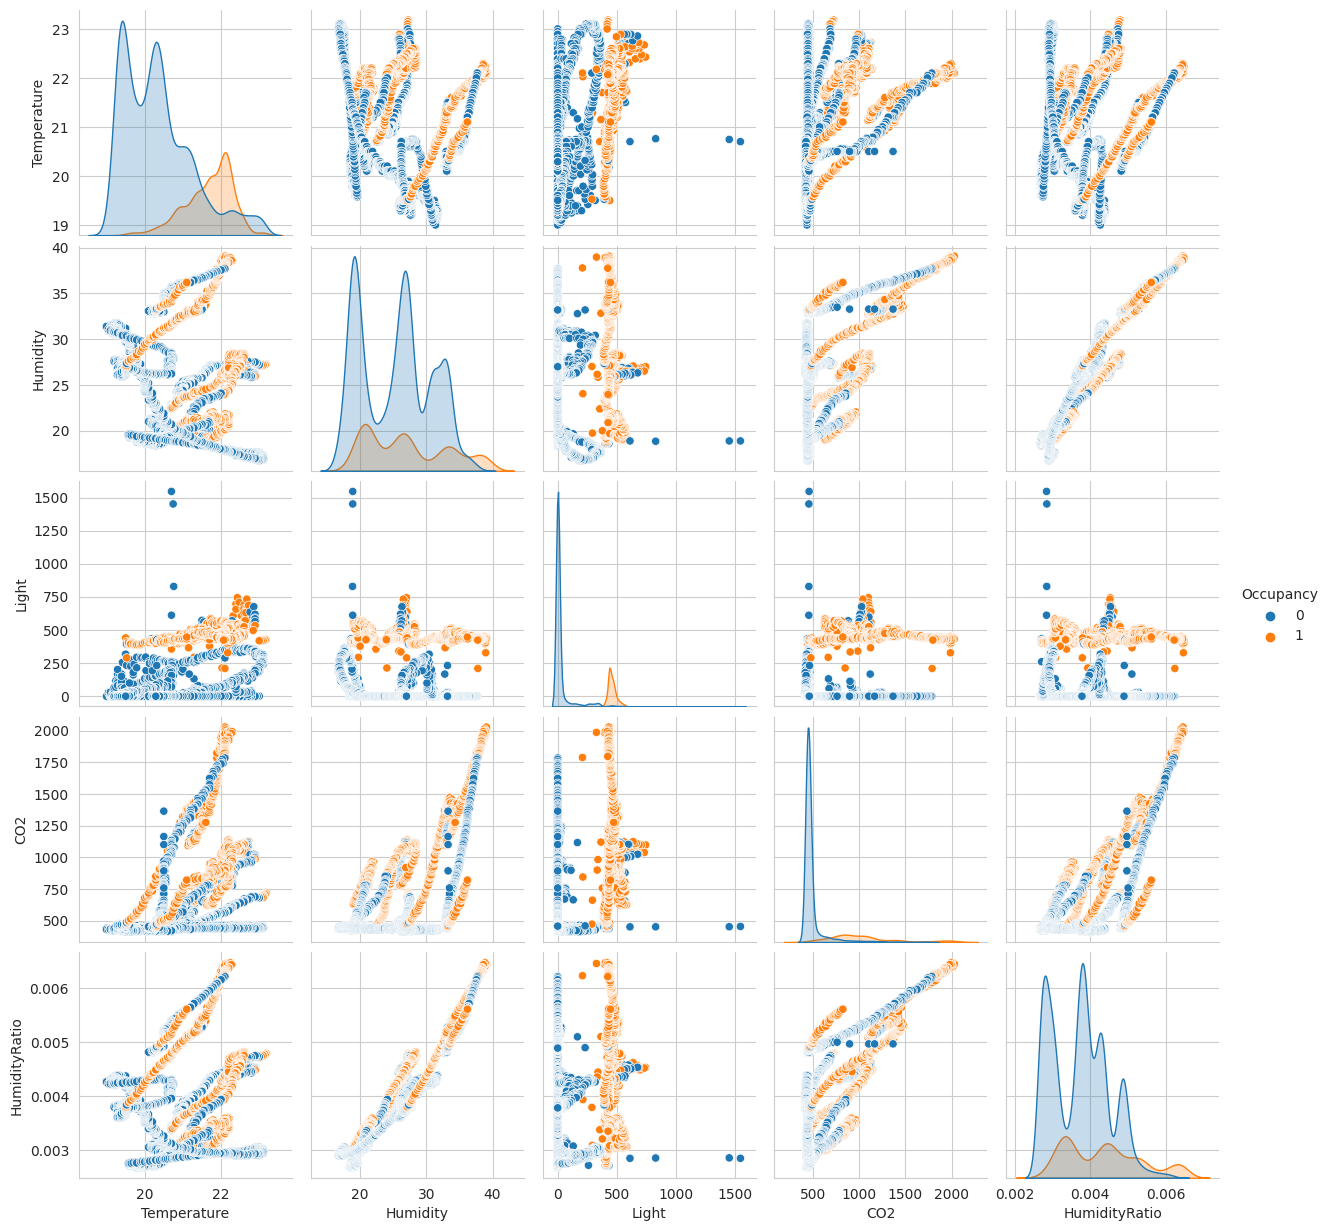

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="Occupancy");
plt.show()

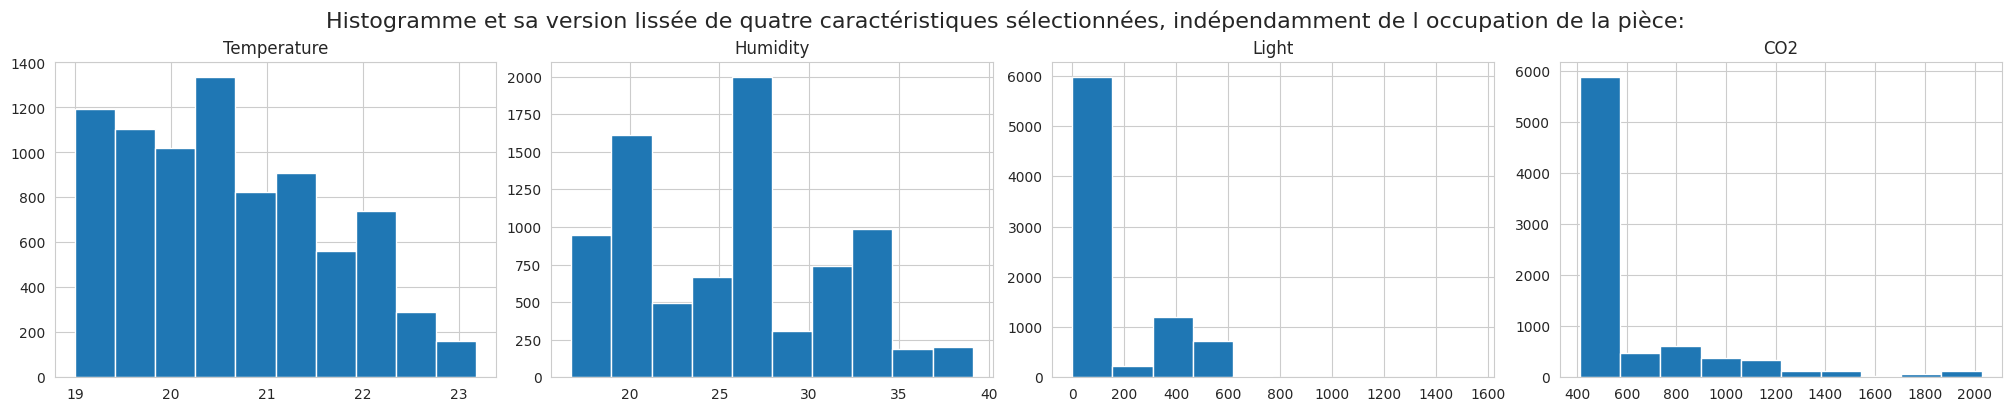

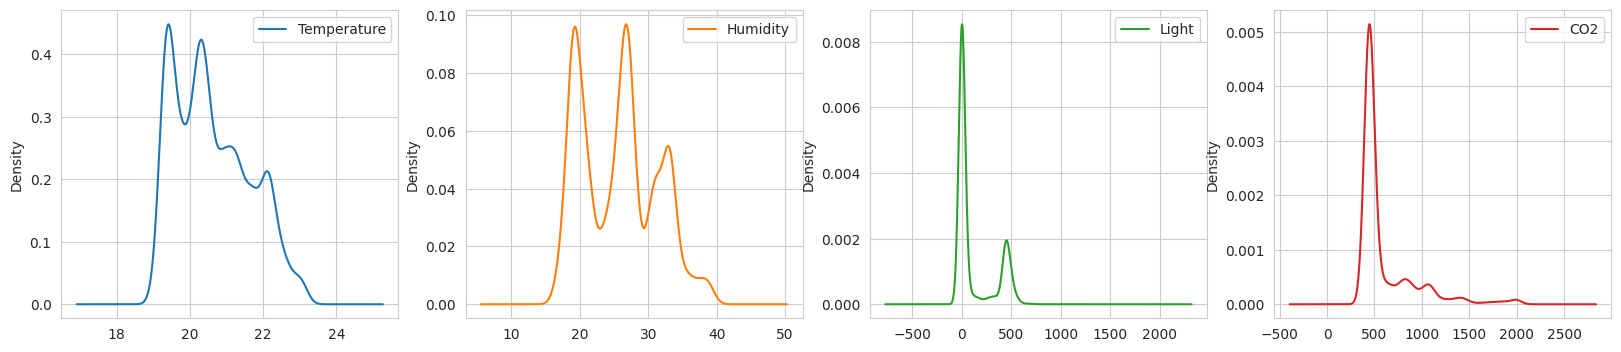

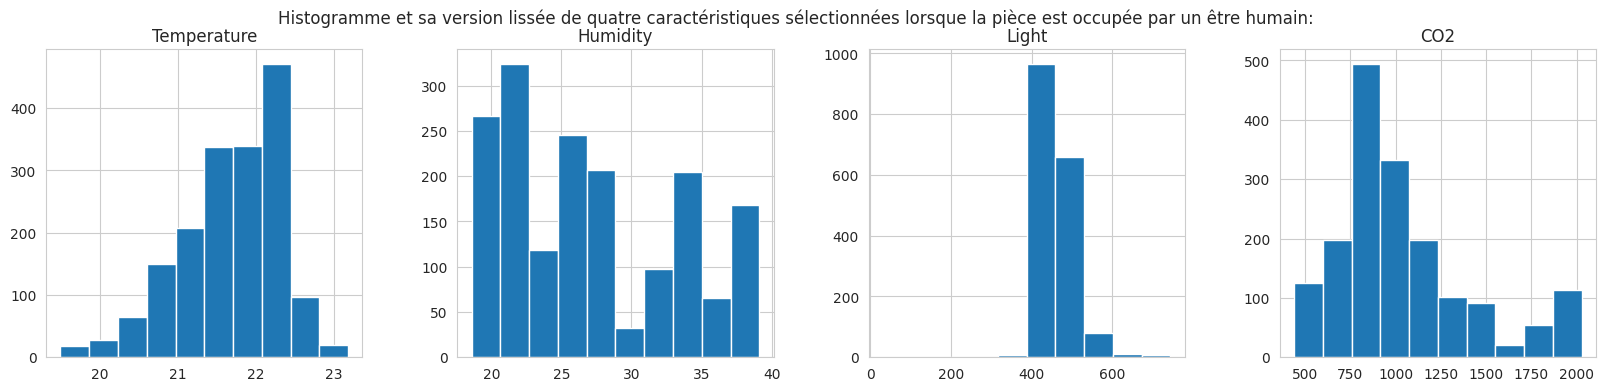

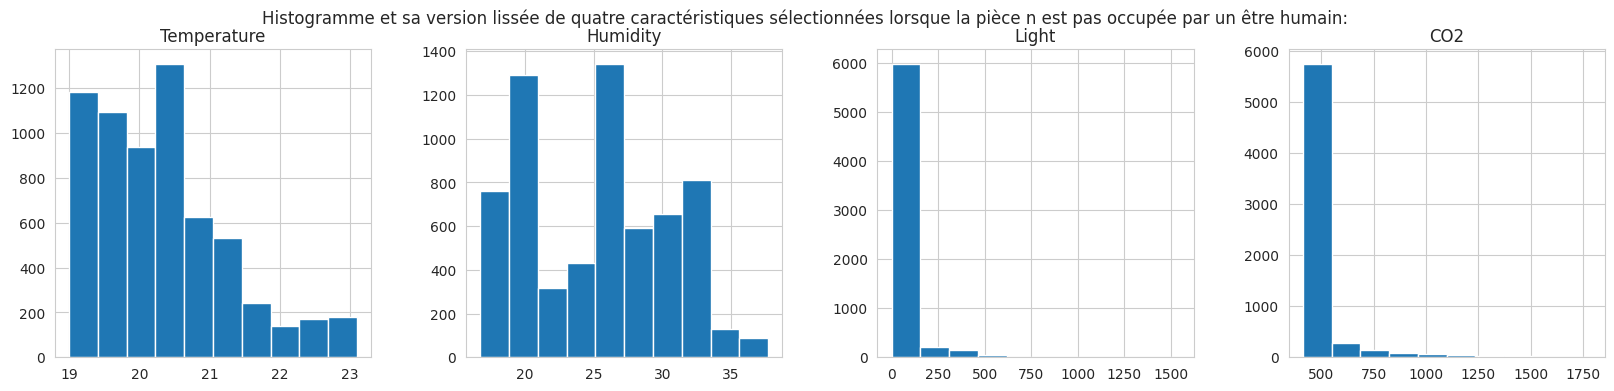

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 4),constrained_layout=True)

features = ["Temperature", "Humidity","Light","CO2"]
f.suptitle('Histogramme et sa version lissée de quatre caractéristiques sélectionnées, indépendamment de l occupation de la pièce:', fontsize=16)
df[features].hist(figsize=(15, 10),ax=ax);
df[features].plot(kind="density", subplots=True, layout=(1, 4), sharex=False, figsize=(20, 4));

print("\n\n\n\n")
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
f.suptitle('Histogramme et sa version lissée de quatre caractéristiques sélectionnées lorsque la pièce est occupée par un être humain:', fontsize=12)
df[df["Occupancy"]==1][features].hist(figsize=(15, 10),ax=ax);

f, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
f.suptitle('Histogramme et sa version lissée de quatre caractéristiques sélectionnées lorsque la pièce n est pas occupée par un être humain:', fontsize=12)
df[df["Occupancy"]==0][features].hist(figsize=(15, 10),ax=ax);

**Étant donné que nous avons des valeurs basses telles que le taux d'humidité et des valeurs élevées comme la lumière et le CO2, il serait judicieux de normaliser les données pour simplifier le processus d'apprentissage.**

In [ ]:
scaler = MinMaxScaler()
columns = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
scaler.fit(np.array(df[columns]))
df[columns] = scaler.transform(np.array(df[columns]))

       Temperature     Humidity        Light          CO2  HumidityRatio
count  8143.000000  8143.000000  8143.000000  8143.000000    8143.000000
mean      0.387341     0.401676     0.077292     0.119942       0.312576
std       0.243281     0.247233     0.125947     0.194536       0.224186
min       0.000000     0.000000     0.000000     0.000000       0.000000
25%       0.167464     0.154431     0.000000     0.016246       0.106304
50%       0.332536     0.423623     0.000000     0.025220       0.296338
75%       0.571770     0.616307     0.165795     0.139925       0.441308
max       1.000000     1.000000     1.000000     1.000000       1.000000


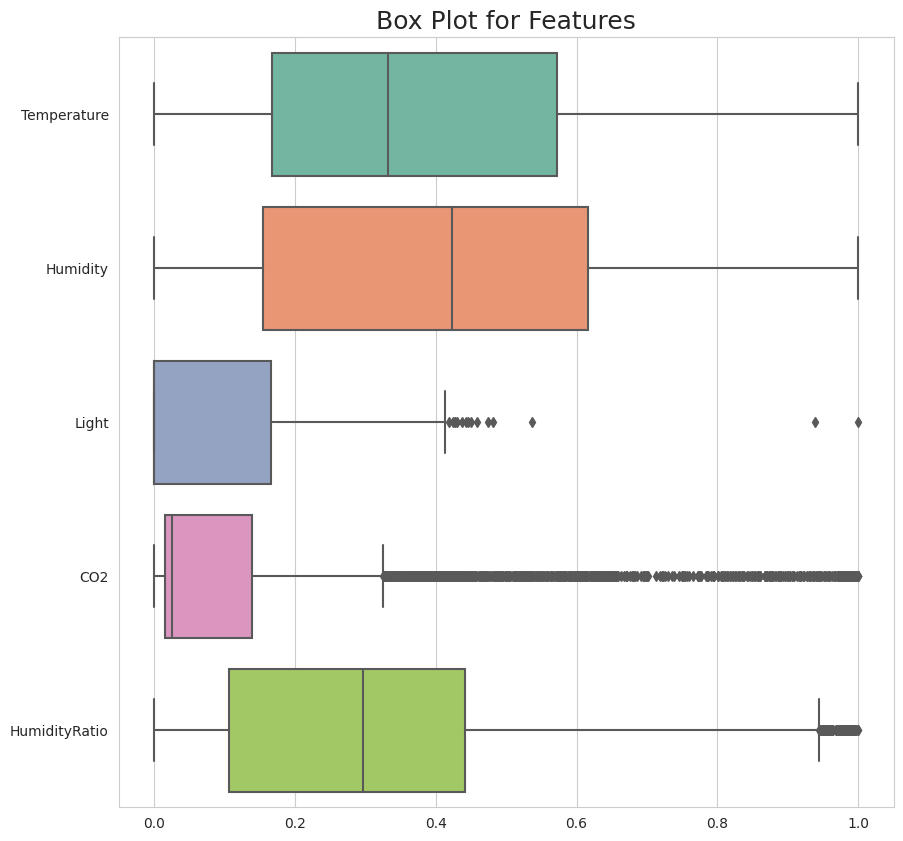

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Box Plot for Features', fontdict={'fontsize':18})
ax = sns.boxplot(data=df.drop(['date', 'Occupancy'],axis=1), orient="h", palette="Set2")
print(df.drop(['date', 'Occupancy'],axis=1).describe())

#### Nombre d'occurrence de chaque classe :

In [ ]:
data=pd.Series(df['Occupancy'])

In [ ]:
data_count=data.value_counts()

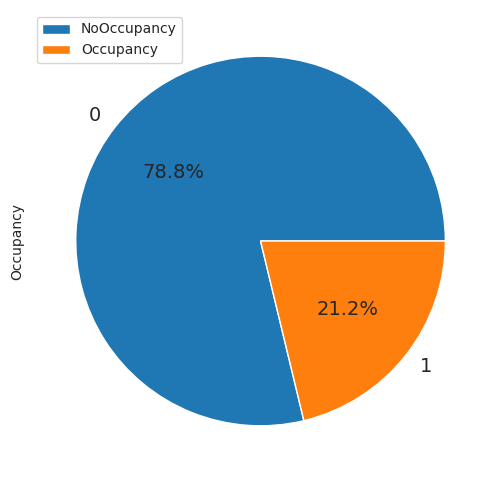

In [ ]:
f, axes = plt.subplots(1,1, figsize=(6,6))
data_count.plot(kind='pie',ax=axes, fontsize=14,shadow=False,autopct='%1.1f%%')
plt.legend(loc='upper left',labels=['NoOccupancy','Occupancy'])

<Axes: >

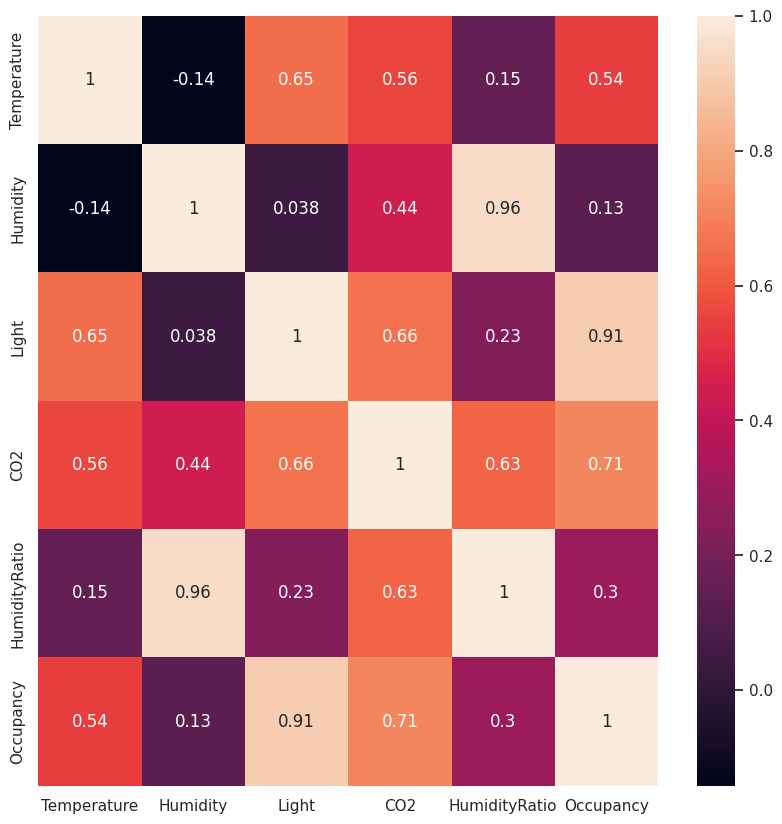

In [ ]:
#matrice de corrélation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

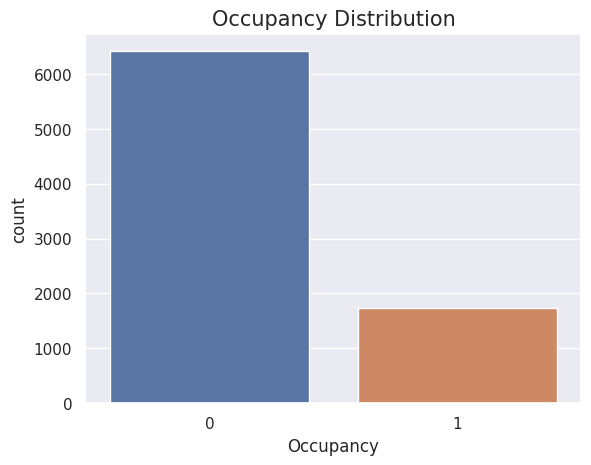

In [ ]:
sns.set(style="darkgrid")
plt.title("Occupancy Distribution", fontdict={'fontsize':15})
ax = sns.countplot(x="Occupancy", data=df)

****

### <span style = "color:green">Feature Engineering</span>

In [14]:
df.drop(['date','Humidity','Light'],axis=1,inplace=True)
 #nous avons supprimer la colonne date  parcequ'on en n'aura pas besoin dans notre étude et les autres car ils présentent une corrélation élevée avec HumidityRatio	et Occupancy dans ce sens
df.head()

,Temperature,CO2,HumidityRatio,Occupancy
1,23.18,721.25,0.004793,1
2,23.15,714.00,0.004783,1
3,23.15,713.50,0.004779,1
4,23.15,708.25,0.004772,1
5,23.10,704.50,0.004757,1


In [138]:

#attribution d'un attribut cible à une valeur distincte
#inputs
X = df.drop(['Occupancy'],axis=1)
#target
y = df['Occupancy']
df.head()

,Temperature,CO2,HumidityRatio,Occupancy
1,23.18,721.25,0.004793,1
2,23.15,714.00,0.004783,1
3,23.15,713.50,0.004779,1
4,23.15,708.25,0.004772,1
5,23.10,704.50,0.004757,1


In [139]:
#oversampling, cette méthode est utilisé dans le cas où les données sont déséquilibrés
#augmenter le nombre d'échantillons de la classe minoritaire et équilibrer le jeu de données en utilisant SMOTE
sm = SMOTE(random_state=2)
X_res, y_res = sm.fit_resample(X, y.ravel())



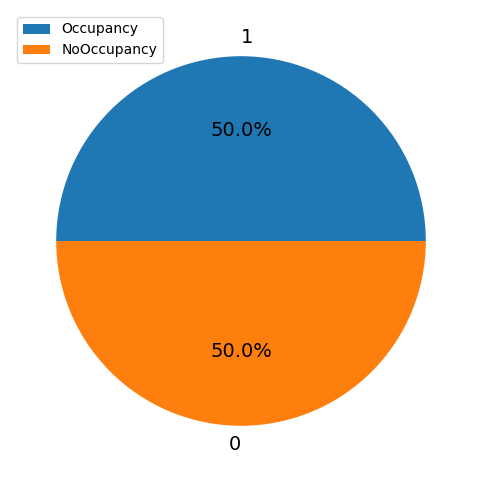

In [140]:
data_count = pd.Series(y_res).value_counts()

fig, ax = plt.subplots(figsize=(6, 6))
data_count.plot(kind='pie', ax=ax, fontsize=14, shadow=False, autopct='%1.1f%%')
plt.legend(loc='upper left', labels=['Occupancy', 'NoOccupancy'])

plt.show()

Partitionnement des données en deux catégories test et apprentissage

In [141]:
# Créez un ensemble de données de training et un ensemble de données de test.
# Choisissez la taille du test de façon à ce que 30% des données soient utilisées pour le test.
# Puisque 'train_test_split()' distribue les points de manière aléatoire, nous fixons un seed égale à 4
# afin que les résultats finaux soient identiques à chaque fois que nous exécutons le fractionnement.
# L'argument 'stratify' permet de diviser les données de telle sorte que
# les ensembles de données de training et de test contiennent une portion égale d'échantillons des deux classes.
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res,
                                                    test_size=0.2,
                                                    random_state=4,
                                                    stratify = y_res)

# **<span style = "color:#E87740">Supervised Learning </span>**

****

# **<span style = "color:#C85740"> KNN : K-Nearest Neighbors Classifier </span>**

****

In [142]:
# Créer un classificateur
knn = KNeighborsClassifier()
# entrainer le classificateur
knn.fit(X_train, y_train)
#Prédire les classes des échantillons du test
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9333593141075605


##### Choisir les meilleurs paramètres pour knn


In [143]:
# Choisissez un ensemble de paramètres à tester sous la forme d'un dictionnaire.
param_grid = {
    'n_neighbors': range(5, 10),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}

# Créer une instance de la classe GridSearchCV.
# Nous choisissons KNeighborsClassifier comme estimateur.
# Choisissez le dictionnaire des paramètres que nous voulons couvrir.
# Choisissons le nombre de splits de validation croisée égal à 3.
#Choisir le nombre de cœurs de CPU utilisés pour le calcul parallèle, nous avons décidé d'utiliser tous les cœurs disponibles (n_jobs = -1).
#verbose = 2 signifie qu'une ligne est imprimée pour chaque modèle ajusté,
#fournissant des informations sur les paramètres du modèle et le score correspondant.
grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                           param_grid = param_grid,
                           cv = 3, n_jobs = -1,
                           verbose = 2)

# Ajustez tous les modèles aux données d'entraînement et choisissez le meilleur en fonction de la précision la plus élevée.
grid_search.fit(X_train, y_train)

#Retourner les paramètres du meilleur modèle
print(grid_search.best_params_)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits
{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 9, 'weights': 'distance'}


In [145]:
# Faire de 'knn' une instance du meilleur modèle.
knn = grid_search.best_estimator_
knn

KNeighborsClassifier(leaf_size=10, n_neighbors=9, weights='distance')

In [146]:
#KNN avec les meilleurs paramètres
knn = KNeighborsClassifier(algorithm='auto', leaf_size=10, n_neighbors=3, weights='distance')
knn.fit(X_train, y_train)

# Prédire les classes des échantillons dans l'ensemble de données de test en utilisant le meilleur modèle.
y_pred = knn.predict(X_test)
# Afficher la précision obtenue par le meilleur modèle.
print(accuracy_score(y_test, y_pred))

0.9368667186282151


              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1285
           1       0.88      0.88      0.88      1281

    accuracy                           0.88      2566
   macro avg       0.88      0.88      0.88      2566
weighted avg       0.88      0.88      0.88      2566



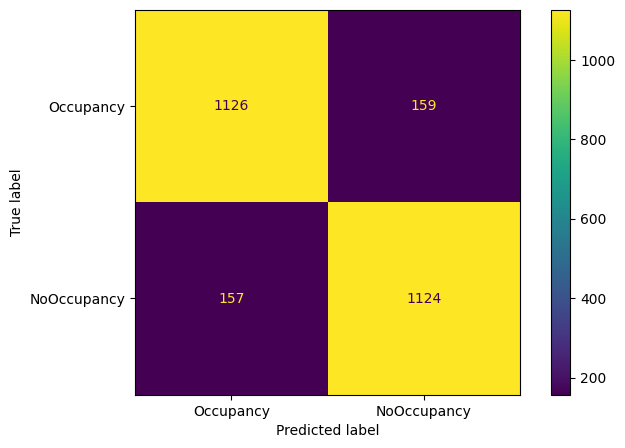

In [232]:
# En enlevant la visualisation du seaborn, on enlève les lignes blanches qui l'accompagnent.
sns.reset_orig()

fig, ax = plt.subplots(figsize=(8, 5))

# Créer une matrice de confusion
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_pred, y_test),
    display_labels=["Occupancy", "NoOccupancy"],
)

cmp.plot(ax=ax);
# afficher le rapport de classification
print(classification_report(y_pred,y_test))
accuracy_list.append(accuracy_score(y_test, y_pred))
f1_score_list.append(f1_score(y_test, y_pred))

La matrice de confusion et le rapport de classification montrent
 que le modèle de machine learning utilisé pour prédire la présence d'occupants dans une pièce est très précis. Sur un ensemble de données de 8143 observations, le modèle a correctement prédit la présence d'occupants dans 100 % des cas.

#### Prédire un échantillon

In [148]:

# Définir les coordonnées d'un point dont on veut identifier la classe.
feature_1 =0.490431
feature_2 =0.865013
feature_3 =0.280017
feature_4 =0.231781
feature_5 =0.763986

In [149]:
# Prédisez la classe d'un échantillon en fonction de ces deux features.
knn.predict([[feature_1, feature_2, feature_3]])

array([0])

In [150]:
# Obtenir la distance du voisin et son index dans un array
neighbors = knn.kneighbors([[feature_1, feature_2, feature_3]])
neighbors


(array([[412.38058316, 412.57941602, 413.62745817]]),
 array([[8290, 9721, 8886]]))

#### Visualisation des voisins

In [151]:
# Créer une palette de couleurs avec des couleurs modifiées
knn_palette= sns.color_palette(['#AABBCC', '#FF0000'])
knn_palette


[(0.6666666666666666, 0.7333333333333333, 0.8), (1.0, 0.0, 0.0)]

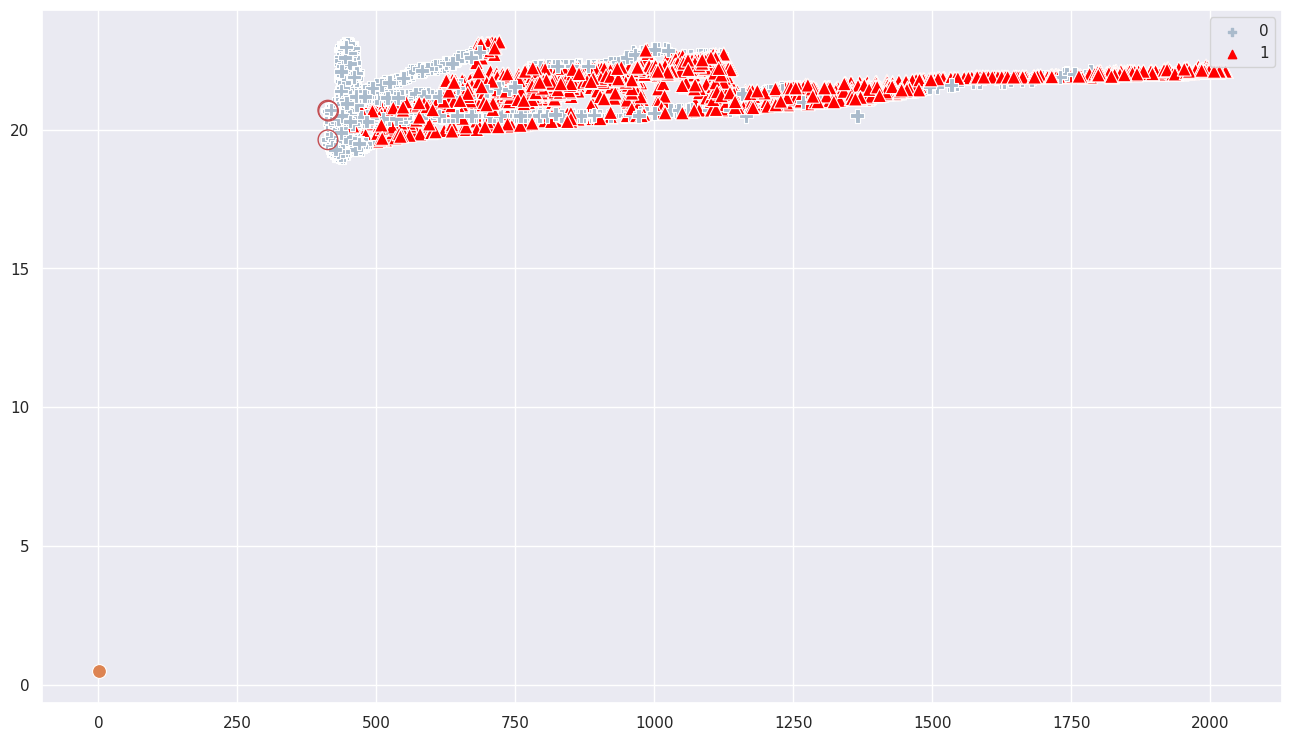

In [152]:
# Appliquer the seaborn style
sns.set()

plt.figure(figsize = (16, 9))

#Convertir X_train,y_train en an array
X_train_array=X_train.values

# Créer un nuage de points.
# Sur l'axe des x, nous avons la première feature.
# Sur l'axe des y, nous avons placé la deuxième feature.
# Le paramètre 'data' indique l'ensemble de données à partir duquel nous dessinons les colonnes.
# Le paramètre 'hue' spécifie la caractéristique en fonction de laquelle les points vont être colorés.
# Le paramètre 'palette' spécifie les couleurs à utiliser dans le graphique.
# Le paramètre 'markers' détermine la forme des points.
# Le paramètre 'style' relie les marqueurs aux classes.
# Le paramètre 's' spécifie la taille des points.
# Nous avons décidé d'attribuer la valeur True au paramètre 'legend'.

# Tracez les points de données provenant des données d'apprentissage.
sns.scatterplot(x =X_train_array[:, 1], y = X_train_array[:, 0],
                hue = y_train,
                palette = knn_palette,
                markers = ['P', '^'],
                style = y_train,
                s = 100,
                legend = True);

# Tracez le point à prédire
sns.scatterplot(x = [feature_2], y = [feature_1],
                style = [feature_1],
                markers = ['o'],
                s = 100,
                legend = False);

# Une liste pour stocker les valeurs x de tous les voisins
plot_x_train = []
# Une liste pour stocker les valeurs y de tous les voisins
plot_y_train = []

# Ajouter toutes les valeurs x et y aux listes respectives.
for i in neighbors[1]:
    plot_x_train.append(X_train_array[i, 1])
    plot_y_train.append(X_train_array[i, 0])

# Inclure tous les plus proches voisins
plt.scatter(plot_x_train,
            plot_y_train,
            s=200, facecolors='none', edgecolors='r');

****

# **<span style = "color:#C85740"> NB(Naive Bays) </span>**

****

In [153]:
# Créer une instance du classificateur Gaussien Naive Bayes
NB= GaussianNB()
# Ajuster le modèle aux données d'entraînement
NB.fit(X_train,y_train)

GaussianNB()

In [154]:
# Prédire l'étiquette des observations dans l'ensemble de test
y_pred = NB.predict(X_test)

#Crée un nouvel objet DataFrame Y à partir d'un array 1D y_pred
Y=pd.DataFrame(y_pred)
#vérifier combien de salles qui sont occupées
Y.value_counts()

0    1285
1    1281
dtype: int64

In [155]:
# Afficher la précision obtenue par le meilleur modèle.
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8769


In [156]:
# Afficher le rapport de classification
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1285
           1       0.88      0.88      0.88      1281

    accuracy                           0.88      2566
   macro avg       0.88      0.88      0.88      2566
weighted avg       0.88      0.88      0.88      2566



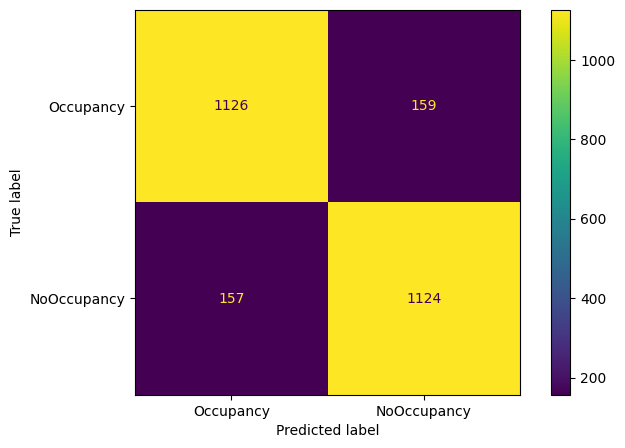

In [157]:
sns.reset_orig()

fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_pred, y_test),
    display_labels=["Occupancy", "NoOccupancy"],
)

cmp.plot(ax=ax);

In [231]:
accuracy_list.append(accuracy_score(y_test, y_pred))
f1_score_list.append(f1_score(y_test, y_pred))

# **<span style = "color:#C85740"> SVM (support vector machine) </span>**

***

In [159]:
#Création d'une instance de l'algorithme de classification par vecteur de support.
#avec la fonction de base radiale comme fonction noyau,
#avec la largeur de la fonction noyau fixée à la valeur par défaut.
classifier = SVC(kernel='rbf', gamma='auto')

In [160]:
# Ajuster le modèle aux données d'entraînement
classifier.fit(X_train, y_train)

SVC(gamma='auto')

In [161]:
#évaluer the accuracy
classifier.score(X_test, y_test)

0.9341387373343726

In [162]:
# Prédire l'étiquette des observations dans l'ensemble de test
yhat = classifier.predict(X_test)

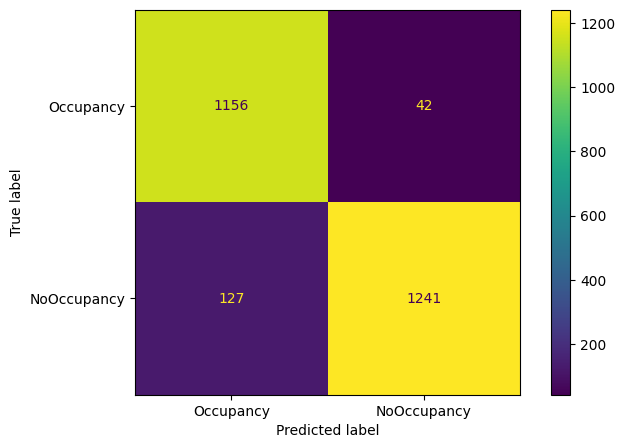

In [163]:
fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(yhat, y_test),
    display_labels=["Occupancy","NoOccupancy"],
)

cmp.plot(ax=ax);

In [164]:
print(classification_report(yhat, y_test ,target_names = ["NoOccupancy", "Occupancy"]))

              precision    recall  f1-score   support

 NoOccupancy       0.90      0.96      0.93      1198
   Occupancy       0.97      0.91      0.94      1368

    accuracy                           0.93      2566
   macro avg       0.93      0.94      0.93      2566
weighted avg       0.94      0.93      0.93      2566



In [230]:
accuracy_list.append(accuracy_score(y_test, yhat))
f1_score_list.append(f1_score(y_test, yhat))

#### Choisir le meilleur noyau et le paramètre C optimal en se basant sur la validation croisée des données d'apprentissage.

In [166]:
# Choisissez un ensemble de paramètres à tester sous la forme d'un dictionnaire.
Grid_parameters = [
    {"kernel": ["linear"], "C": [1, 10]},
    {"kernel": ["poly"], "C":[1, 10]},
    {"kernel": ["rbf"], "gamma":["auto"], "C": [1, 10]}
]

In [167]:
# Choisissez une métrique de notation. Nous avons décidé d'utiliser la précision et le rappel
scores = ["precision", "recall"]

In [ ]:
for score in scores:
    print("## hyper-parameters for %s" % score)
    print()

    # Créer une instance de la classe GridSearchCV.
    best_classifier = GridSearchCV(SVC(), Grid_parameters, scoring="%s_macro" % score)
    # Ajustez tous les modèles aux données d'entraînement et choisissez le meilleur
    #en fonction du score le plus élevé (précision ou rappel).
    best_classifier.fit(X_train, y_train)

    # Retourner les paramètres du meilleur modèle
    print("Best parameters set found on development set:")
    print()
    print(best_classifier.best_params_)
    print()

    # afficher le rapport de classification du meilleur modèle.
    print("Detailed classification report:")
    print()
    y_pred =best_classifier.predict(X_test)
    print(classification_report(y_test, y_pred))
    print()


# **<span style = "color:#C85740">DECISION TREE </span>**

***

In [169]:
# Le classificateur arbre de décision de la bibliothèque sklearn
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Définir le classificateur en arbre
clf = DecisionTreeClassifier(criterion='entropy')

In [170]:
# Entraînement/création de l'arbre de décision
clf = clf.fit(X_train, y_train)

In [171]:
clf.score(X_test, y_test)

0.9797349961028838

In [172]:
test_pred = clf.predict(X_test)

In [173]:
print(classification_report(test_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1271
           1       0.98      0.98      0.98      1295

    accuracy                           0.98      2566
   macro avg       0.98      0.98      0.98      2566
weighted avg       0.98      0.98      0.98      2566



In [229]:
accuracy_list.append(accuracy_score(y_test, test_pred))
f1_score_list.append(f1_score(y_test, test_pred))

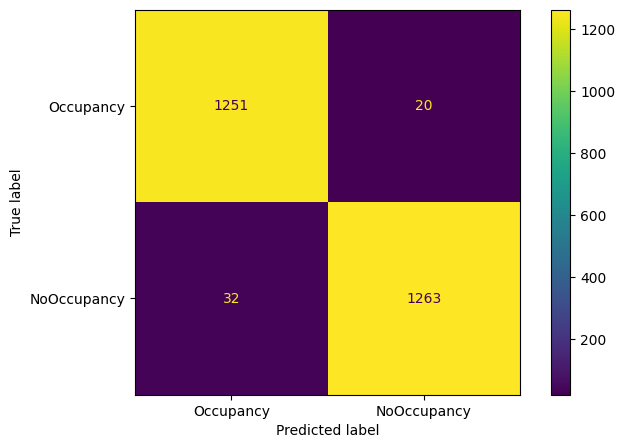

In [175]:
fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(test_pred, y_test),
    display_labels=["Occupancy", "NoOccupancy"],
)

cmp.plot(ax=ax);

On peut voir que c'est un arbre trop compliqué (overfitting)
Les arbres de décision ont tendance à s'adapter excessivement.
Il existe une technique pour traiter cet overfitting : pruning.
L'algorithme de pruning le plus populaire est Minimal cost-complexity pruning.
Nous fixons le paramètre de complexité à 0,01.

[Text(0.4090909090909091, 0.9, 'x[1] <= 494.042\nentropy = 1.0\nsamples = 10262\nvalue = [5131, 5131]'),
 Text(0.18181818181818182, 0.7, 'x[1] <= 456.583\nentropy = 0.132\nsamples = 4492\nvalue = [4410, 82]'),
 Text(0.09090909090909091, 0.5, 'entropy = 0.016\nsamples = 3460\nvalue = [3455, 5]'),
 Text(0.2727272727272727, 0.5, 'entropy = 0.383\nsamples = 1032\nvalue = [955, 77]'),
 Text(0.6363636363636364, 0.7, 'x[1] <= 756.125\nentropy = 0.543\nsamples = 5770\nvalue = [721, 5049]'),
 Text(0.45454545454545453, 0.5, 'x[2] <= 0.004\nentropy = 0.944\nsamples = 1278\nvalue = [462, 816]'),
 Text(0.36363636363636365, 0.3, 'entropy = 0.718\nsamples = 803\nvalue = [159, 644]'),
 Text(0.5454545454545454, 0.3, 'entropy = 0.944\nsamples = 475\nvalue = [303, 172]'),
 Text(0.8181818181818182, 0.5, 'x[0] <= 20.735\nentropy = 0.318\nsamples = 4492\nvalue = [259, 4233]'),
 Text(0.7272727272727273, 0.3, 'x[2] <= 0.005\nentropy = 1.0\nsamples = 147\nvalue = [74, 73]'),
 Text(0.6363636363636364, 0.1, 'ent

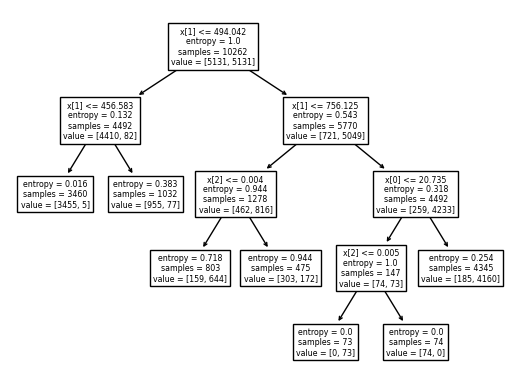

In [176]:
clf = DecisionTreeClassifier(criterion='entropy',ccp_alpha=0.01)
clf = clf.fit(X_train, y_train)
plot_tree(clf)

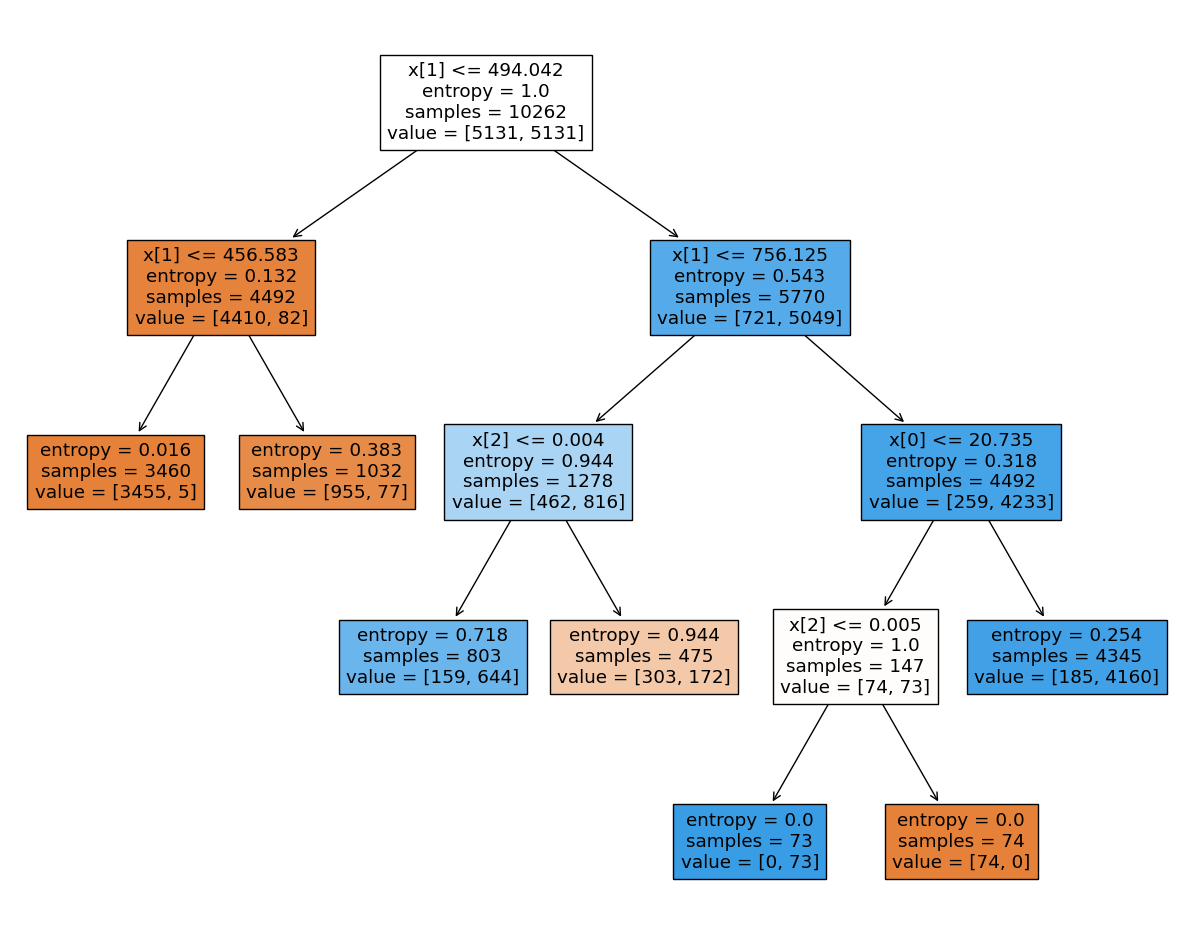

In [177]:
plt.figure(figsize=(15,12))
plot_tree(clf, filled=True)
plt.show()

In [178]:
clf.score(X_test, y_test)

0.9384255650818394

In [179]:
test_pred = clf.predict(X_test)

In [180]:
print(classification_report(test_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1261
           1       0.95      0.93      0.94      1305

    accuracy                           0.94      2566
   macro avg       0.94      0.94      0.94      2566
weighted avg       0.94      0.94      0.94      2566



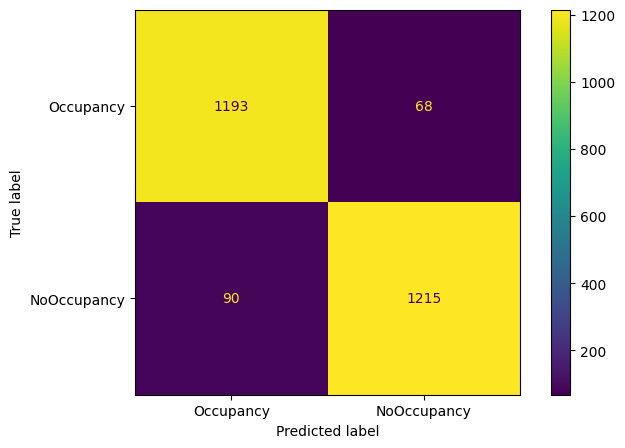

In [181]:
fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(test_pred, y_test),
    display_labels=["Occupancy","NoOccupancy"],
)

cmp.plot(ax=ax);

# **<span style = "color:#E87740">Unsupervised Learning </span>**

****

# **<span style = "color:#C85740">Kmeans </span>**

***

In [182]:
# Importez le module KMeans pour que nous puissions effectuer le clustering k-means avec sklearn.
from sklearn.cluster import KMeans
# Créer un objet (que nous appellerons kmeans)
# Le nombre entre parenthèses est K, ou le nombre de clusters que nous voulons obtenir.
kmeans = KMeans(2)

In [183]:
# Ajuster les données d'entrée, c'est-à-dire regrouper les données de X en K clusters.
kmeans.fit(X)

KMeans(n_clusters=2)

In [184]:
# Créer une variable qui contiendra les clusters prédits pour chaque observation.
identified_clusters = kmeans.fit_predict(X)
# Vérifiez les résultats
np.unique(identified_clusters)


array([0, 1], dtype=int32)

In [185]:
# Créer une copie des données
data_with_clusters = X.copy()
# Créer une nouvelle série, contenant le cluster identifié pour chaque observation.
data_with_clusters['Cluster'] = identified_clusters
# Vérifiez les résultats
data_with_clusters

,Temperature,CO2,HumidityRatio,Cluster
1,23.18,721.250000,0.004793,0
2,23.15,714.000000,0.004783,0
3,23.15,713.500000,0.004779,0
4,23.15,708.250000,0.004772,0
5,23.10,704.500000,0.004757,0
...,...,...,...,...
8139,21.05,787.250000,0.005579,0
8140,21.05,789.500000,0.005563,0
8141,21.10,798.500000,0.005596,0
8142,21.10,820.333333,0.005621,0


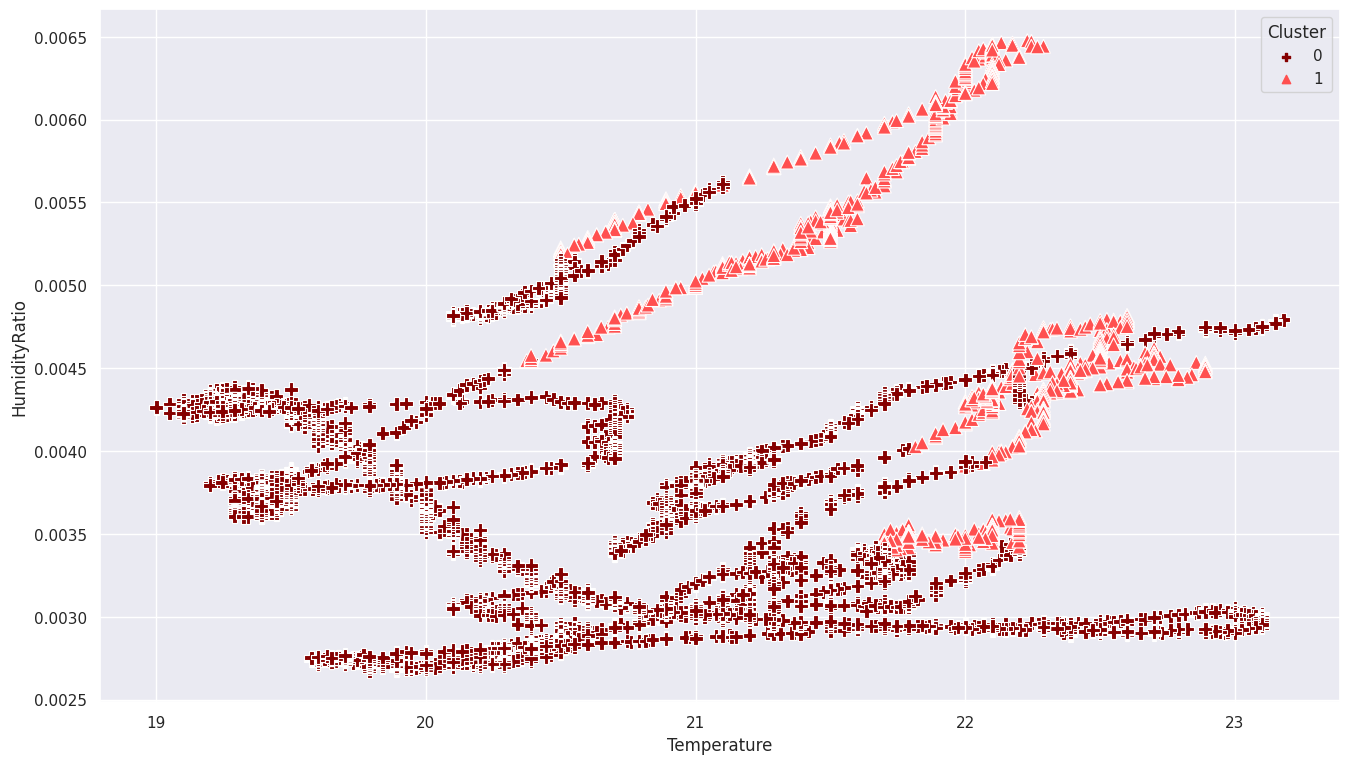

In [186]:
# Créez une palette de couleurs
knn_palette = sns.color_palette(['#850000' ,'#FF5050'])

# Appliquer the seaborn style
sns.set()

plt.figure(figsize = (16, 9))

sns.scatterplot(x = data_with_clusters['Temperature'], y = data_with_clusters['HumidityRatio'],
                data = data_with_clusters,
                hue = 'Cluster',
                palette = knn_palette,
                markers = ['P', '^'],
                style = "Cluster",
                s = 100
              );

In [187]:
dbi = metrics.davies_bouldin_score(X, identified_clusters)
dunn_index = 1/ dbi


In [188]:
score = metrics.silhouette_score(X, identified_clusters)
print("Dunn index:", dunn_index)
print("Silouette score:",score)

Dunn index: 2.185645517875695
Silouette score: 0.800648701315756


In [190]:
indice_dunn_list=[]
score_list=[]
indice_dunn_list.append(dunn_index)
score_list.append(score)


### Sélection du nombre de clusters

#### Elbow Method

La méthode du Elbow est une représentation graphique de la recherche du "K" optimal dans un clustering K-means.

Text(0, 0.5, 'Cost of model(inertia)')

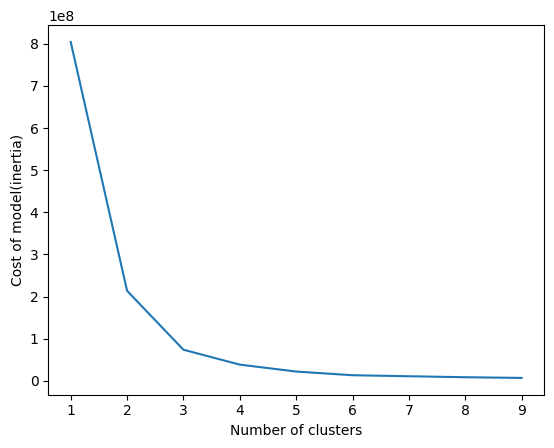

In [191]:
#réinitialiser le style seaborn
sns.reset_orig()

inertia = []
K_range = range(1, 10)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Cost of model(inertia)')

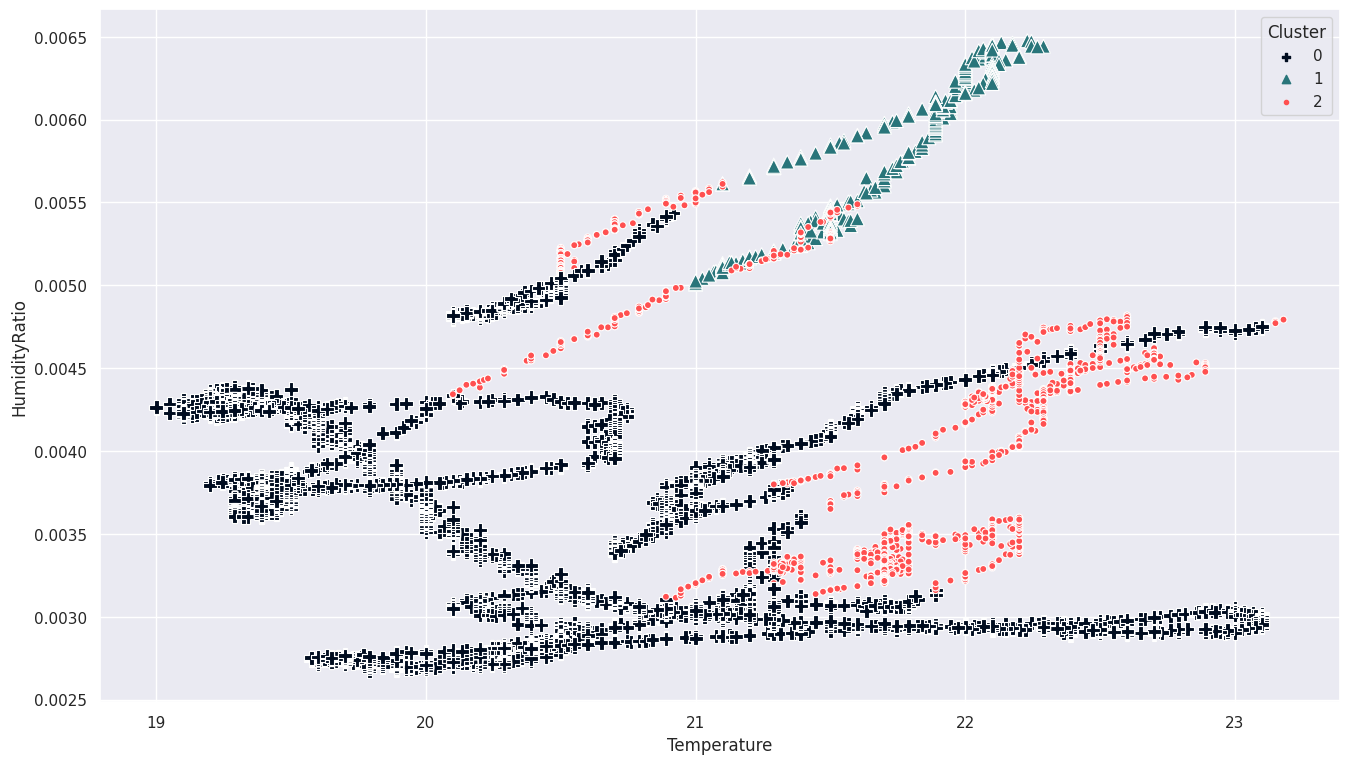

In [192]:
kmeans = KMeans(3)
kmeans.fit(X)
identified_clusters = kmeans.fit_predict(X)
data_with_clusters = X.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters.head()


# Appliquer the seaborn style
sns.set()

plt.figure(figsize = (16, 9))

# Créez une deuxième palette de couleurs
knn_palette2 = sns.color_palette(['#000C1F','#29757A' ,'#FF5050'])

sns.scatterplot(x = data_with_clusters['Temperature'], y = data_with_clusters['HumidityRatio'],
                data = data_with_clusters,
                hue = 'Cluster',
                palette = knn_palette2,
                markers = ['P', '^','.'],
                style = "Cluster",
                s = 100
              );


In [193]:
dbi = metrics.davies_bouldin_score(X, identified_clusters)
dunn_index = 1/ dbi
print("Dunn index:", dunn_index)

Dunn index: 2.2006830616983724


In [194]:
score = metrics.silhouette_score(X, identified_clusters)
score

0.8230766336261793

# **<span style = "color:#C85740">Hierarchical Clustering</span>**

***

#### Agglomerative Hierarchical Clustering

In [195]:
# Définir l'AgglomerativeClustering
CMA=AgglomerativeClustering()
# Définir la grille de paramètres
param_grid = {'n_clusters':[2,3,4,5,6,7,8,9], 'affinity':["euclidean", "l1", "l2",
    "manhattan", "cosine", ",precomputed"], 'linkage':['ward', 'complete', 'average', 'single']}
# Définir la métrique de scoring
scoring = make_scorer(silhouette_score)
# Initialiser l'objet GridSearchCV
grid_search = GridSearchCV(CMA, param_grid, cv=5, scoring=scoring, refit='silhouette_score')
# Adapter l'objet GridSearchCV aux données
grid_search.fit(X)

# afficher les meilleurs paramètres et le meilleur score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'affinity': 'euclidean', 'linkage': 'ward', 'n_clusters': 2}
nan


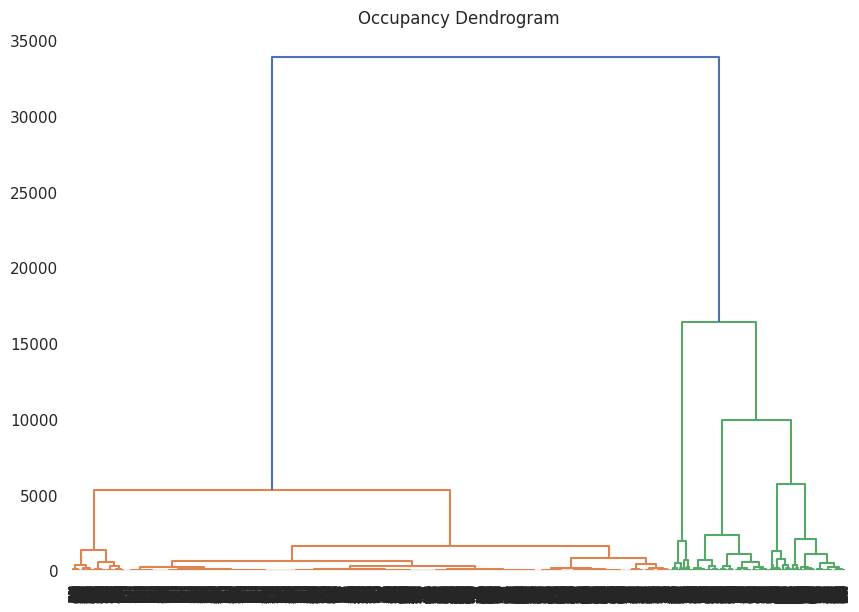

In [196]:
plt.figure(figsize=(10, 7))
plt.title("Occupancy Dendrogram")

selected_data = X
clusters = shc.linkage(selected_data,
            method='ward',
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

In [ ]:
# Faites de 'AgglomerativeClustering' une instance du meilleur modèle.
clustering_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward') # ward linkage

In [199]:
#Ajuster le modèle
clustering_model.fit(X)

AgglomerativeClustering(affinity='euclidean')

In [200]:
data_labels=clustering_model.labels_
data_labels

array([0, 0, 0, ..., 0, 0, 0])

In [201]:
#faire une copie des entrées pour ne pas modifier le dataframe original
X_copy=X.copy()
#ajouter une colonne
X_copy['cluster'] = data_labels
X_copy

,Temperature,CO2,HumidityRatio,cluster
1,23.18,721.250000,0.004793,0
2,23.15,714.000000,0.004783,0
3,23.15,713.500000,0.004779,0
4,23.15,708.250000,0.004772,0
5,23.10,704.500000,0.004757,1
...,...,...,...,...
8139,21.05,787.250000,0.005579,0
8140,21.05,789.500000,0.005563,0
8141,21.10,798.500000,0.005596,0
8142,21.10,820.333333,0.005621,0


In [202]:
np.unique(clusters)

array([0.00000000e+00, 1.25725130e-06, 1.26137177e-06, ...,
       1.62830000e+04, 1.64573995e+04, 3.38968620e+04])

In [203]:
X_copy['cluster'].value_counts()

1    6309
0    1834
Name: cluster, dtype: int64

In [204]:
# Créez une palette de couleurs
palette = sns.color_palette(['#850000' ,'#FF5050'])
palette

[(0.5215686274509804, 0.0, 0.0), (1.0, 0.3137254901960784, 0.3137254901960784)]

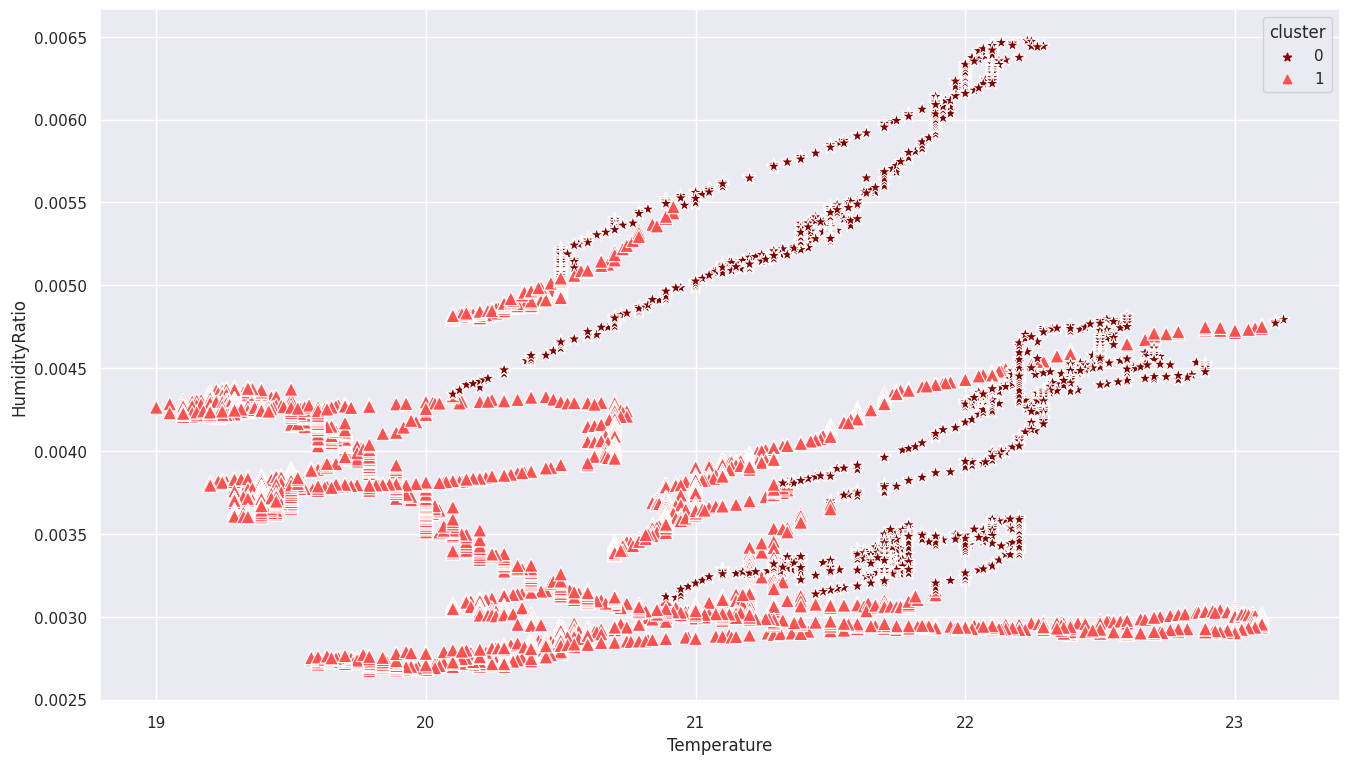

In [205]:
# Appliquer the seaborn style
sns.set()

plt.figure(figsize = (16, 9))
sns.scatterplot(x = 'Temperature', y = 'HumidityRatio',
                data = X_copy,
                hue = 'cluster',
                palette = palette,
                markers = ['*', '^'],
                style = "cluster",
                s = 100
              );

In [206]:
#indice de Dunn
dbi = metrics.davies_bouldin_score(X, data_labels)
dunn_index = 1/ dbi


In [207]:
#Silhouette score
score = metrics.silhouette_score(X, data_labels)

print("Dunn index:", dunn_index)
print("Silouhette score:", score)

Dunn index: 2.173399731429437
Silouhette score: 0.7996711771108712


In [208]:
indice_dunn_list.append(dunn_index)
score_list.append(score)

# **<span style = "color:#E87740">Deep Learning </span>**

***

# **<span style = "color:#C85740">MLP </span>**

In [209]:
#création d'une instance de l'algorithme de classification
mlp_clf = MLPClassifier()

In [210]:
#Évaluer un score par validation croisée.
mlp_scores = cross_val_score(mlp_clf, X_train, y_train, cv = 50)
mlp_scores

array([0.89320388, 0.90291262, 0.90776699, 0.87378641, 0.9368932 ,
       0.93203883, 0.90776699, 0.7961165 , 0.90291262, 0.91262136,
       0.96116505, 0.90291262, 0.88292683, 0.91219512, 0.92195122,
       0.87317073, 0.87804878, 0.84390244, 0.92682927, 0.90731707,
       0.74634146, 0.90243902, 0.90731707, 0.92682927, 0.92195122,
       0.88780488, 0.89756098, 0.93170732, 0.93170732, 0.83414634,
       0.93658537, 0.90731707, 0.90243902, 0.94146341, 0.95121951,
       0.91219512, 0.91219512, 0.91219512, 0.93170732, 0.95609756,
       0.93658537, 0.88292683, 0.89756098, 0.91219512, 0.91219512,
       0.95609756, 0.93658537, 0.90731707, 0.91707317, 0.92682927])

In [211]:
#Calculer la moyenne des scores
print(f'Mlp scores: {mlp_scores.mean()}')

Mlp scores: 0.9062604783329387


In [212]:
# Ajuster le modèle aux données d'entraînement
mlp_clf.fit(X_train, y_train)

MLPClassifier()

In [60]:
#Tester le modèle
#Prédire the target des observations de l'ensemble de test
yhat = mlp_clf.predict(X_test)
print(classification_report(yhat, y_test))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1406
           1       0.84      0.93      0.89      1160

    accuracy                           0.89      2566
   macro avg       0.89      0.89      0.89      2566
weighted avg       0.90      0.89      0.89      2566



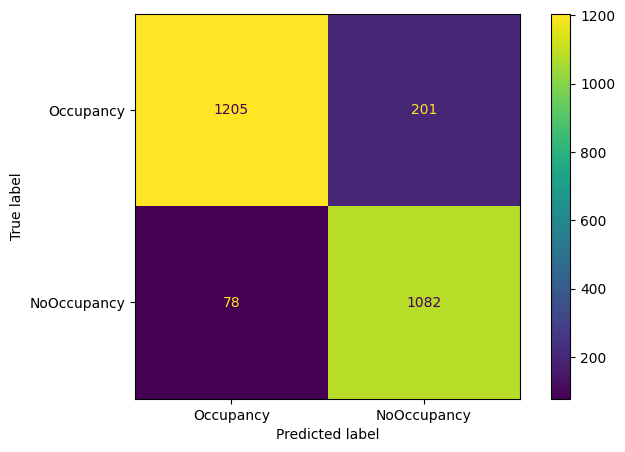

In [61]:
#Créer la matrice de cofusion
sns.reset_orig()

fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(yhat, y_test),
    display_labels=["Occupancy","NoOccupancy"],
)

cmp.plot(ax=ax);

#### Meilleur modèle

Pour pouvoir améliorer le modèle on va utilisé la fonction gridsearch

In [102]:

# Choisissez un ensemble de paramètres à tester sous la forme d'un dictionnaire.
params = {'activation': ['relu','sigmoid','tanh'],
         'solver': ['lbfgs', 'sgd','adam'],
          'hidden_layer_sizes': [(10,),  (2,), (3,), (4,), (8,), (16,)],
         }
# Créez une instance de la classe GridSearchCV.
#Choisissez le nombre de divisions de validation croisée égal à 5.
gr = GridSearchCV(mlp_clf, params, cv=5)

In [103]:
# Ajustez tous les modèles aux données d'entraînement et choisissez le meilleur.
gr.fit(X=X_train, y=y_train)

GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='tanh',
                                     hidden_layer_sizes=(16,),
                                     learning_rate_init=0.01, max_iter=10000,
                                     random_state=0),
             param_grid={'activation': ['relu', 'sigmoid', 'tanh'],
                         'hidden_layer_sizes': [(10,), (2,), (3,), (4,), (8,),
                                                (16,)],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [104]:
gr.best_estimator_

MLPClassifier(activation='tanh', hidden_layer_sizes=(16,),
              learning_rate_init=0.01, max_iter=10000, random_state=0)

In [100]:

#mlp avec les meilleurs paramètres
mlp_clf =MLPClassifier(activation='tanh', hidden_layer_sizes=(16,),learning_rate_init=0.01, max_iter=10000, random_state=0)
#Ajuster le meilleur modèle
mlp_clf.fit(X_train, y_train)
y_pred = mlp_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9298519095869057


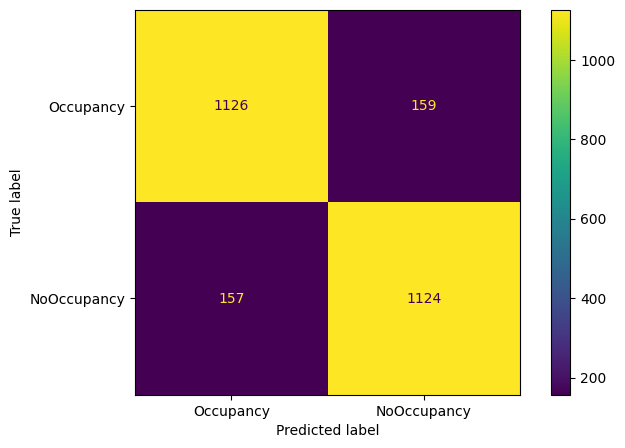

In [99]:
#Créer la matrice de cofusion pour le meilleur modèle
sns.reset_orig()

fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_pred, y_test),
    display_labels=["Occupancy","NoOccupancy"],
)

cmp.plot(ax=ax);

In [95]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1285
           1       0.88      0.88      0.88      1281

    accuracy                           0.88      2566
   macro avg       0.88      0.88      0.88      2566
weighted avg       0.88      0.88      0.88      2566



In [233]:
accuracy_list.append(accuracy_score(y_test, y_pred))
f1_score_list.append(f1_score(y_test, y_pred))

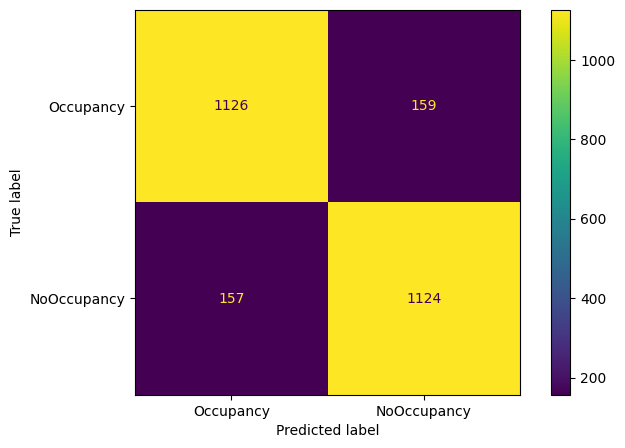

In [97]:
# En enlevant la visualisation du seaborn, on enlève les lignes blanches qui l'accompagnent.
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix,accuracy_score,silhouette_score,make_scorer
sns.reset_orig()

fig, ax = plt.subplots(figsize=(8, 5))

# Créer une matrice de confusion
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_pred, y_test),
    display_labels=["Occupancy", "NoOccupancy"],
)

cmp.plot(ax=ax);


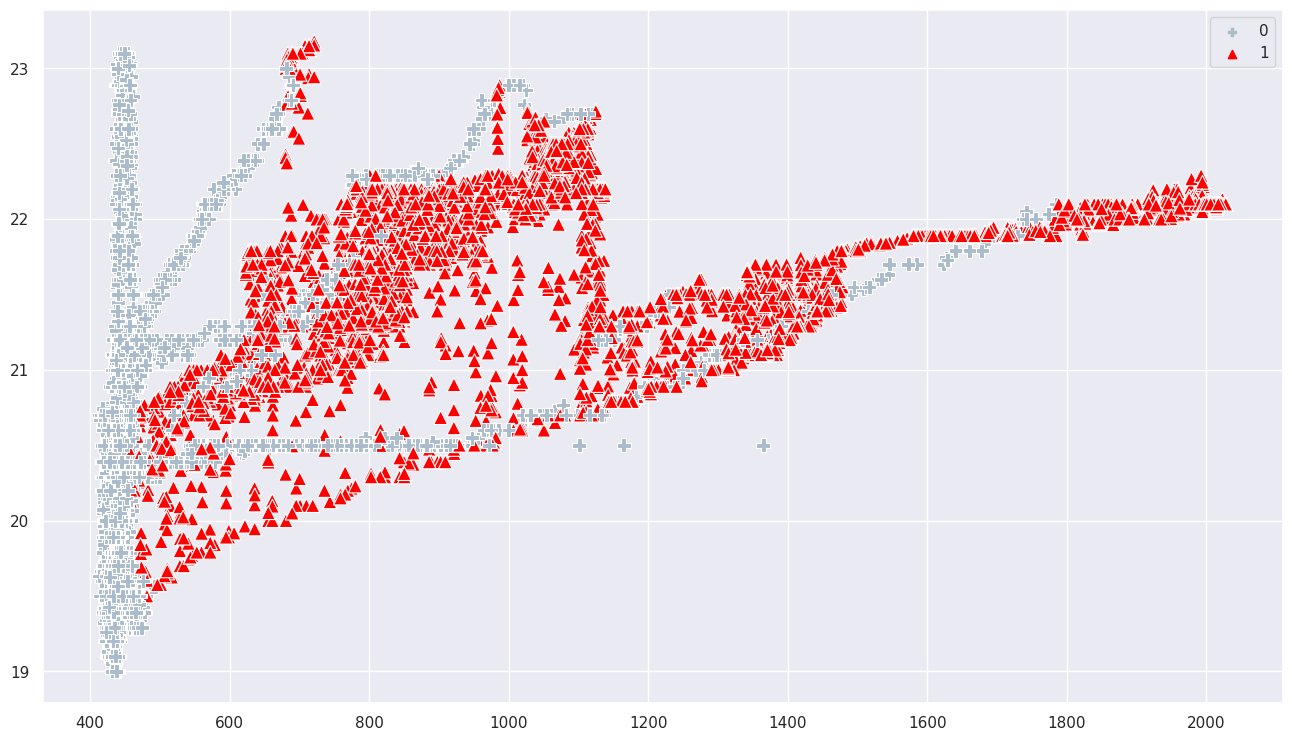

In [127]:
# Appliquer the seaborn style
sns.set()

plt.figure(figsize = (16, 9))

#Convertir X_train,X_test en un array
X_train_array=X_train.values
X_test_array=X_test.values

# Tracez les points de données des données d'apprentissage.
sns.scatterplot(x =X_train_array[:, 1], y = X_train_array[:, 0],
                hue = y_train,
                palette = knn_palette,
                markers = ['P', '^'],
                style = y_train,
                s = 100,
                legend = True);


# Tracez les points de données provenant des données de test.
sns.scatterplot(x =X_test_array[:, 1], y = X_test_array[:, 0],
                hue = y_test,
                palette = knn_palette,
                markers = ['P', '^'],
                style = y_test,
                s = 100,
                legend = False);

# Une liste pour stocker les valeurs x_test de tous les voisins.
plot_x_train = []
# Une liste pour stocker les valeurs y_test de tous les voisins
plot_y_train = []


# **<span style = "color:#E87740">Comparaison de la performance des algorithmes  </span>**

COMPARAISON ENTRE LES MODELES SUPERVISES ET MLP

In [ ]:
sns.set()

plt.figure(figsize = (16, 9))


n=5
r = np.arange(n)
width = 0.25

plt.bar(r, accuracy_list, color = '#29757A',
        width = width, edgecolor = 'none',
        label='accuracy_score')
plt.bar(r + width, f1_score_list, color = '#FF5050',
        width = width, edgecolor = 'none',
        label='f1_score')

plt.xlabel("Algorithmes")
plt.ylabel("Metric")
plt.title("Comparaison de la performance des algorithmes selon accuracy et f1 ")

# plt.grid(linestyle='--')
plt.xticks(r + width/2,['KNN','NB','SVM','DT','MLP'])
plt.legend()

plt.show()

COMPARAISON ENTRE LES MODELES NON SUPERVISES

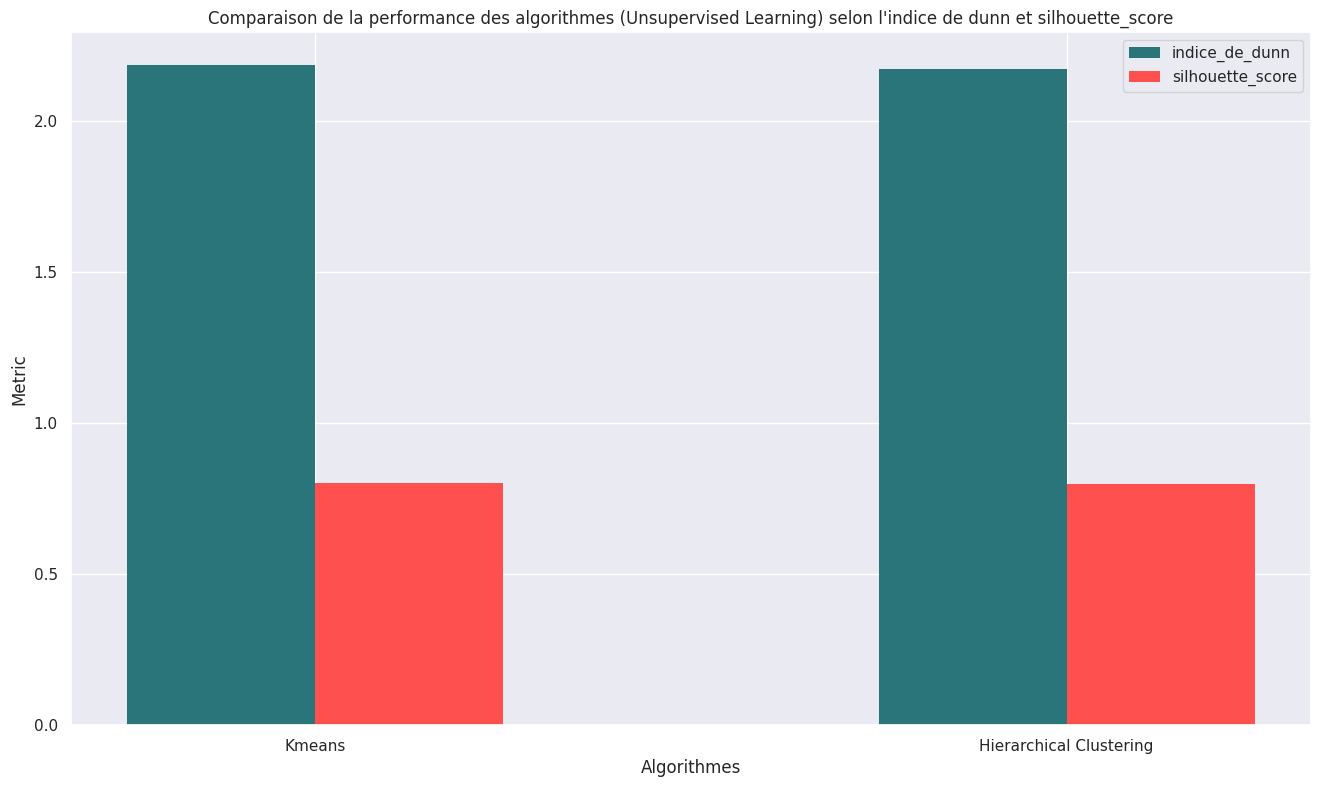

In [225]:
sns.set()

plt.figure(figsize = (16, 9))


n=2
r = np.arange(n)
width = 0.25

plt.bar(r, indice_dunn_list, color = '#29757A',
        width = width, edgecolor = 'none',
        label='indice_de_dunn')
plt.bar(r + width, score_list, color = '#FF5050',
        width = width, edgecolor = 'none',
        label='silhouette_score')

plt.xlabel("Algorithmes")
plt.ylabel("Metric")
plt.title("Comparaison de la performance des algorithmes (Unsupervised Learning) selon l'indice de dunn et silhouette_score")

# plt.grid(linestyle='--')
plt.xticks(r + width/2, ['Kmeans', 'Hierarchical Clustering'])
plt.legend()

plt.show()